In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
# fixing random state for reproducibility
np.random.seed(19680801)

In [3]:
z = np.random.rand(6, 10)

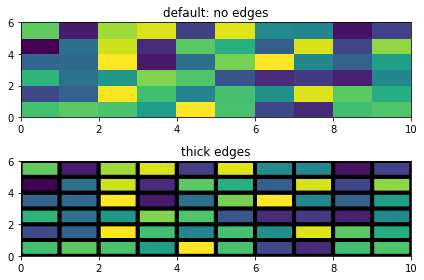

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1)

c = ax1.pcolor(z)
ax1.set_title("default: no edges")

c = ax2.pcolor(z, edgecolors="k", linewidths=4)
ax2.set_title("thick edges")

fig.tight_layout()
plt.show()

In [5]:
# make these smaller to increase the resolution
dx, dy = 0.15, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[-3:3+dy:dy, -3:3+dx:dx]
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

# x and y are bounds, so z should be the value *inside* those bounds
# therefore, remove the last value from the z array
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

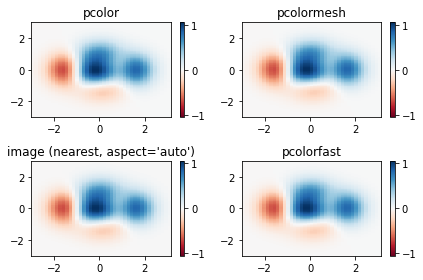

In [6]:
fig, axs = plt.subplots(2, 2)

ax = axs[0, 0]
c = ax.pcolor(x, y, z, cmap="RdBu", vmin=z_min, vmax=z_max)
ax.set_title("pcolor")
fig.colorbar(c, ax=ax)

ax = axs[0, 1]
c = ax.pcolormesh(x, y, z, cmap="RdBu", vmin=z_min, vmax=z_max)
ax.set_title("pcolormesh")
fig.colorbar(c, ax=ax)

ax = axs[1, 0]
c = ax.imshow(
    z, cmap="RdBu", vmin=z_min, vmax=z_max,
    extent=[x.min(), x.max(), y.min(), y.max()],
    interpolation="nearest", origin="lower", aspect="auto",
)
ax.set_title("image (nearest, aspect='auto')")
fig.colorbar(c, ax=ax)

ax = axs[1, 1]
c = ax.pcolorfast(x, y, z, cmap="RdBu", vmin=z_min, vmax=z_max)
ax.set_title("pcolorfast")
fig.colorbar(c, ax=ax)

fig.tight_layout()
plt.show()

In [7]:
n = 100
x, y = np.meshgrid(np.linspace(-3, 3, n), np.linspace(-2, 2, n))

# a low hump with a spike coming out
# needs to have z/color axis on a log scale so we see both hump and spike
# linear scale only shows the spike
z1 = np.exp(-x**2 - y**2)
z2 = np.exp(-(x*10)**2 - (y*10)**2)
z = z1 + 50 * z2

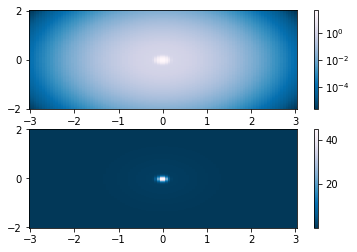

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)

c = ax1.pcolor(
    x, y, z, shading="auto", cmap="PuBu_r",
    norm=LogNorm(vmin=z.min(), vmax=z.max()),
)
fig.colorbar(c, ax=ax1)

c = ax2.pcolor(x, y, z, shading="auto", cmap="PuBu_r")
fig.colorbar(c, ax=ax2)

plt.show()